In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
import scipy.stats as st
import plotly.express as px
import matplotlib.pyplot as plt
from collections import Counter
from ydata_profiling import ProfileReport
import warnings 
warnings.filterwarnings("ignore")
sns.set(color_codes = True)   
sns.set_palette(palette = 'mako', n_colors = 8)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("/kaggle/input/mxmh-survey-results/mxmh_survey_results.csv")
df=data.copy()
df

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,10/30/2022 14:37:28,17.0,Spotify,2.0,Yes,Yes,No,Rock,Yes,Yes,...,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve,I understand.
732,11/1/2022 22:26:42,18.0,Spotify,1.0,Yes,Yes,No,Pop,Yes,Yes,...,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve,I understand.
733,11/3/2022 23:24:38,19.0,Other streaming service,6.0,Yes,No,Yes,Rap,Yes,No,...,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve,I understand.
734,11/4/2022 17:31:47,19.0,Spotify,5.0,Yes,Yes,No,Classical,No,No,...,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve,I understand.


In [3]:
df.columns

Index(['Timestamp', 'Age', 'Primary streaming service', 'Hours per day',
       'While working', 'Instrumentalist', 'Composer', 'Fav genre',
       'Exploratory', 'Foreign languages', 'BPM', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects',
       'Permissions'],
      dtype='object')

In [4]:
df.shape

(736, 33)

In [5]:
def check_df(df: object, head: object = 5) -> object:
    print("\nShape")
    print(df.shape)
    print("\nTypes")
    print(df.dtypes)
    print("\nNANs")
    print(df.isnull().sum())
    print("\nInfo")
    print(df.info())
check_df(df)


Shape
(736, 33)

Types
Timestamp                        object
Age                             float64
Primary streaming service        object
Hours per day                   float64
While working                    object
Instrumentalist                  object
Composer                         object
Fav genre                        object
Exploratory                      object
Foreign languages                object
BPM                             float64
Frequency [Classical]            object
Frequency [Country]              object
Frequency [EDM]                  object
Frequency [Folk]                 object
Frequency [Gospel]               object
Frequency [Hip hop]              object
Frequency [Jazz]                 object
Frequency [K pop]                object
Frequency [Latin]                object
Frequency [Lofi]                 object
Frequency [Metal]                object
Frequency [Pop]                  object
Frequency [R&B]                  object
Frequency [Rap] 

In [6]:
print('Number of duplicated rows: ' ,len(df[df.duplicated()]))

Number of duplicated rows:  0


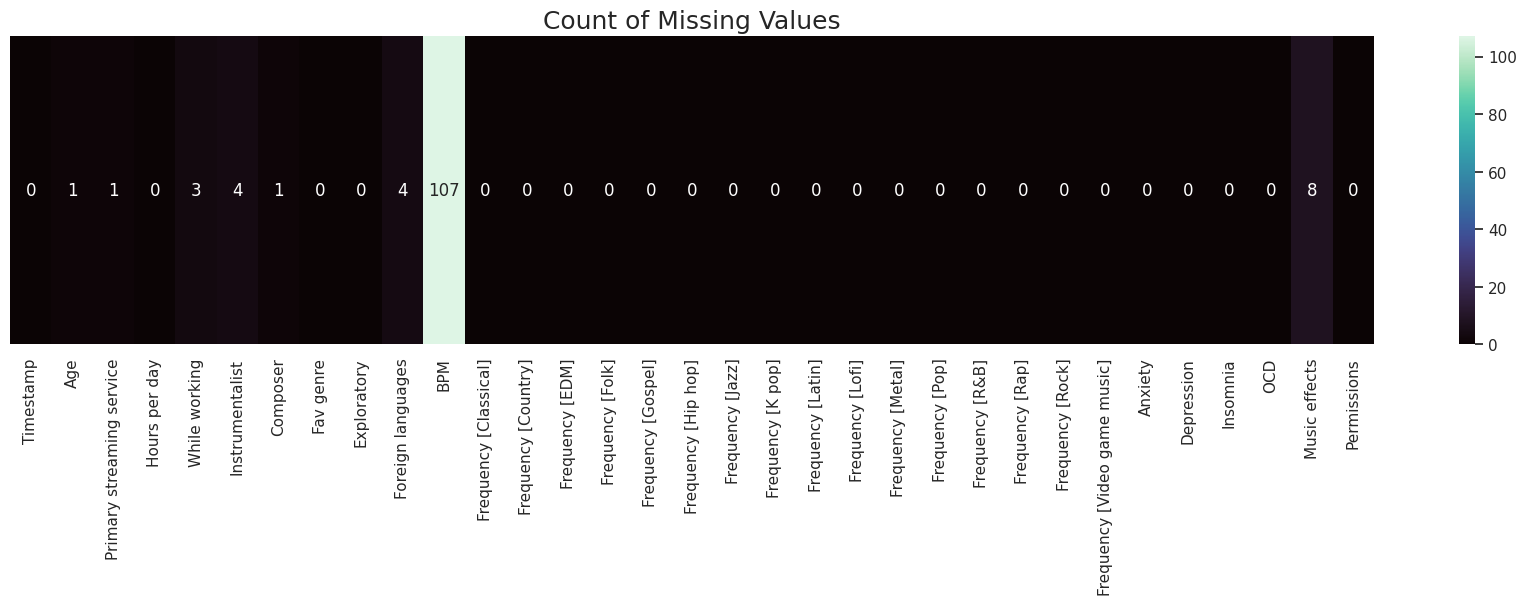

In [7]:
plt.figure(figsize=(22,4))
sns.heatmap((df.isna().sum()).to_frame(name='').T,cmap='mako', annot=True,
           fmt='0.0f').set_title('Count of Missing Values', fontsize=18)
plt.show()

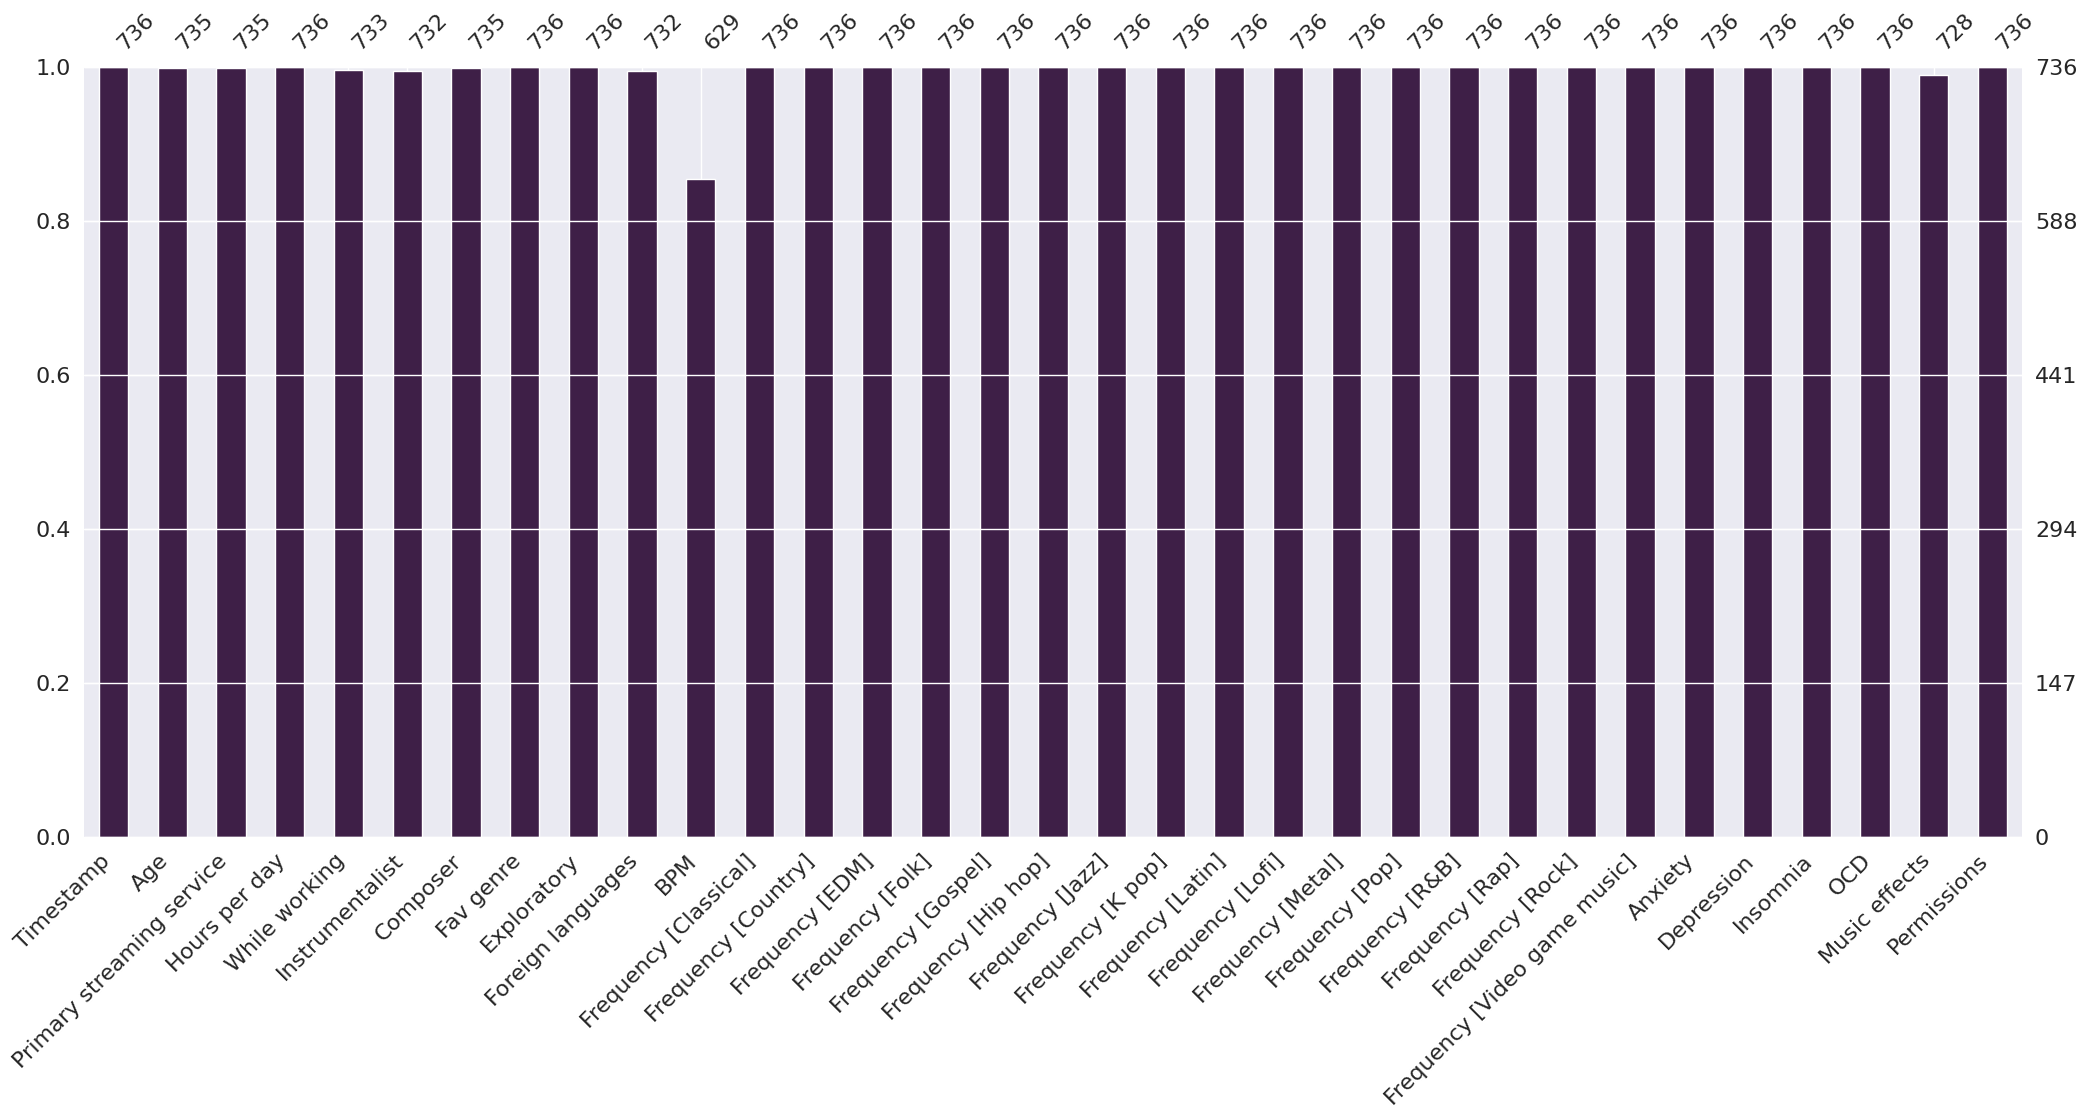

In [8]:
import missingno as msno
msno.bar(df, color='#3E1F47')
plt.show()

* There is no duplicated row but we can see 129 NAN dates.
* 26 columns have Object type and the rest have float64 type.

In [9]:
df[df['Age'].isnull()]

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
12,8/27/2022 23:04:00,NaN,Spotify,3.0,Yes,No,No,Hip hop,Yes,Yes,...,Sometimes,Rarely,Rarely,Never,9.0,3.0,2.0,7.0,Improve,I understand.


In [10]:
df[df['Primary streaming service'].isnull()]

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
197,8/28/2022 20:50:37,21.0,NaN,5.0,Yes,No,No,Country,Yes,No,...,Never,Rarely,Very frequently,Never,9.0,8.0,9.0,7.0,Improve,I understand.


In [11]:
df[df['Instrumentalist'].isnull()]

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
223,8/28/2022 22:06:46,18.0,YouTube Music,12.0,Yes,NaN,No,K pop,Yes,Yes,...,Sometimes,Sometimes,Rarely,Never,3.0,7.0,5.0,2.0,Improve,I understand.
408,8/29/2022 23:36:14,13.0,YouTube Music,3.0,Yes,NaN,Yes,Classical,No,No,...,Never,Never,Never,Never,8.0,7.0,9.0,2.0,Improve,I understand.
561,9/4/2022 5:22:34,21.0,Spotify,1.0,NaN,NaN,NaN,K pop,Yes,NaN,...,Sometimes,Sometimes,Very frequently,Rarely,4.0,5.0,2.0,5.0,NaN,I understand.
572,9/4/2022 21:29:06,18.0,Spotify,3.0,Yes,NaN,No,Video game music,Yes,Yes,...,Sometimes,Never,Never,Very frequently,7.0,0.0,3.0,1.0,No effect,I understand.


In [12]:
df[df['Composer'].isnull()]

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
561,9/4/2022 5:22:34,21.0,Spotify,1.0,NaN,NaN,NaN,K pop,Yes,NaN,...,Sometimes,Sometimes,Very frequently,Rarely,4.0,5.0,2.0,5.0,NaN,I understand.


In [13]:
df[df['Foreign languages'].isnull()]

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
235,8/28/2022 22:39:58,31.0,Spotify,2.0,No,Yes,No,Metal,Yes,NaN,...,Rarely,Sometimes,Very frequently,Sometimes,7.0,6.0,6.0,5.0,Improve,I understand.
396,8/29/2022 20:03:04,14.0,YouTube Music,1.5,No,Yes,No,Classical,Yes,NaN,...,Never,Never,Rarely,Sometimes,1.0,2.0,4.0,3.0,Improve,I understand.
561,9/4/2022 5:22:34,21.0,Spotify,1.0,NaN,NaN,NaN,K pop,Yes,NaN,...,Sometimes,Sometimes,Very frequently,Rarely,4.0,5.0,2.0,5.0,NaN,I understand.
666,9/15/2022 0:33:58,15.0,Spotify,3.0,Yes,Yes,No,Rock,No,NaN,...,Never,Never,Very frequently,Rarely,4.0,3.0,5.0,0.0,No effect,I understand.


In [14]:
df[df['BPM'].isnull()]

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
10,8/27/2022 22:51:15,18.0,Spotify,3.0,Yes,Yes,No,Country,Yes,No,...,Rarely,Never,Rarely,Never,7.0,7.0,4.0,7.0,No effect,I understand.
12,8/27/2022 23:04:00,NaN,Spotify,3.0,Yes,No,No,Hip hop,Yes,Yes,...,Sometimes,Rarely,Rarely,Never,9.0,3.0,2.0,7.0,Improve,I understand.
15,8/27/2022 23:19:52,17.0,Spotify,2.0,No,No,No,Pop,Yes,Yes,...,Rarely,Sometimes,Sometimes,Rarely,7.0,5.0,4.0,1.0,Worsen,I understand.
30,8/28/2022 10:30:22,20.0,Apple Music,5.0,Yes,Yes,No,Rock,Yes,Yes,...,Sometimes,Sometimes,Very frequently,Rarely,7.0,7.0,2.0,0.0,Improve,I understand.
32,8/28/2022 10:54:30,19.0,Spotify,6.0,Yes,Yes,No,Metal,Yes,Yes,...,Never,Never,Sometimes,Sometimes,9.0,8.0,2.0,3.0,Improve,I understand.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688,9/24/2022 0:42:39,18.0,Spotify,4.0,Yes,No,No,R&B,No,No,...,Very frequently,Sometimes,Never,Never,8.0,0.0,0.0,2.0,No effect,I understand.
700,10/3/2022 10:00:01,20.0,YouTube Music,1.0,Yes,No,No,Pop,No,Yes,...,Rarely,Sometimes,Rarely,Very frequently,8.0,9.0,6.0,5.0,Worsen,I understand.
706,10/3/2022 15:38:19,23.0,Spotify,1.0,Yes,Yes,No,Rock,Yes,Yes,...,Sometimes,Sometimes,Very frequently,Very frequently,8.0,6.0,1.0,4.0,Improve,I understand.
712,10/4/2022 8:53:39,23.0,I do not use a streaming service.,3.0,Yes,No,No,Rock,No,No,...,Rarely,Never,Very frequently,Never,10.0,5.0,2.0,0.0,Improve,I understand.


In [15]:
df[df['While working'].isnull()]

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
57,8/28/2022 13:08:24,42.0,I do not use a streaming service.,0.0,NaN,No,No,Rock,No,Yes,...,Rarely,Never,Sometimes,Sometimes,9.0,0.0,10.0,0.0,No effect,I understand.
426,8/30/2022 16:47:39,30.0,Spotify,13.0,NaN,No,No,K pop,Yes,Yes,...,Very frequently,Sometimes,Very frequently,Sometimes,10.0,10.0,10.0,7.0,Improve,I understand.
561,9/4/2022 5:22:34,21.0,Spotify,1.0,NaN,NaN,NaN,K pop,Yes,NaN,...,Sometimes,Sometimes,Very frequently,Rarely,4.0,5.0,2.0,5.0,NaN,I understand.


# Credit:

https://www.kaggle.com/code/melissamonfared/mental-health-music-relationship-analysis-eda/notebook